<a href="https://colab.research.google.com/github/cristinarainich/Child-Mind-Institute-Project/blob/main/Pheno_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set()

In [4]:
working_path = Path('/content/drive/MyDrive/KKNV')

In [5]:
cd /content/drive/MyDrive/KKNV

/content/drive/MyDrive/KKNV


## File informations from different releases

In [ ]:
!ls /content/drive/MyDrive/KKNV

In [ ]:
# info on whether there are phenotypical full files and imaging data availale
file1 = pd.read_csv(
    working_path.joinpath('HBN_R1_1_Pheno.csv'),
    index_col=None
)
file2 = pd.read_csv(
    working_path.joinpath('HBN_R2_1_Pheno.csv'),
    index_col=None
)
file3 = pd.read_csv(
    working_path.joinpath('HBN_R3_Pheno.csv'),
    index_col=None
)
file4 = pd.read_csv(
    working_path.joinpath('HBN_R4_Pheno.csv'),
    index_col=None
)
file5 = pd.read_csv(
    working_path.joinpath('HBN_R5_Pheno.csv'),
    index_col=None
)
file6 = pd.read_csv(
    working_path.joinpath('HBN_R6_Pheno.csv'),
    index_col=None
)
file7 = pd.read_csv(
    working_path.joinpath('HBN_R7_Pheno.csv'),
    index_col=None
)
file8 = pd.read_csv(
    working_path.joinpath('HBN_R8_Pheno.csv'),
    index_col=None
)
file9 = pd.read_csv(
    working_path.joinpath('HBN_R9_Pheno.csv'),
    index_col=None
)
file10 = pd.read_csv(
    working_path.joinpath('HBN_R10_Pheno.csv'),
    index_col=None
)

In [ ]:
fullpheno = pd.concat([file1, file2])
fullpheno = pd.concat([fullpheno, file3])
fullpheno = pd.concat([fullpheno, file4])
fullpheno = pd.concat([fullpheno, file5])
fullpheno = pd.concat([fullpheno, file6])
fullpheno = pd.concat([fullpheno, file7])
fullpheno = pd.concat([fullpheno, file8])
fullpheno = pd.concat([fullpheno, file9])
fullpheno = pd.concat([fullpheno, file10])

In [ ]:
fullpheno.to_csv(
    Path(working_path).joinpath('full_pheno.csv')
)

## Creating a file on MRI and full pheno information

In [ ]:
# file with the identifiers that have mri imaging
fullpheno = pd.read_csv(
    working_path.joinpath('full_pheno.csv'),
    index_col=None
)

In [ ]:
fullpheno.head()

,Unnamed: 0,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
0,0,NDARYM832PX3,1.0,7.048254,-33.35,No,Yes
1,1,NDARNJ687DMC,1.0,6.348163,46.67,No,Yes
2,2,NDARFM080VAF,1.0,7.623203,-100.00,No,Yes
3,3,NDARFW130NGG,1.0,8.316107,93.34,No,Yes
4,4,NDARDT800YVF,0.0,17.510381,86.67,No,Yes


In [ ]:
print(fullpheno.shape)
print(len(fullpheno.EID.unique()))
# there are some identifiers that are repeated in the table

(5106, 7)
4245


In [ ]:
unique = []
repetition = []
for i in fullpheno.EID.values:
  if i not in unique:
    unique.append(i)
  else:
    repetition.append(i)
print(fullpheno.shape[0])
print(len(unique))
print(len(repetition))

5106
4245
861


In [ ]:
full_no_doubles = fullpheno.drop_duplicates()

In [ ]:
unique = []
repetition = []
for i in full_no_doubles.EID.values:
  if i not in unique:
    unique.append(i)
  else:
    repetition.append(i)
print(full_no_doubles.shape[0])
print(len(unique))
print(len(repetition))
# still there is some repetition but let's see whether something disappears when we clean data

5105
4245
860


In [ ]:
full_no_doubles.groupby(['Full_Pheno']).count()

,Unnamed: 0,EID,Sex,Age,EHQ_Total,Commercial_Use
Full_Pheno,,,,,,
No,760,760,760,760,757,760
Yes,4344,4344,4344,4344,4264,4344


In [ ]:
pheno_mri = full_no_doubles[full_no_doubles['Full_Pheno'] == 'Yes']
print(pheno_mri.shape)

(4344, 7)


In [ ]:
pheno_mri.groupby(['Sex']).count()
# Sex 1 - female, 0 - male

,Unnamed: 0,EID,Age,EHQ_Total,Commercial_Use,Full_Pheno
Sex,,,,,,
0.0,2797,2797,2797,2741,2797,2797
1.0,1547,1547,1547,1523,1547,1547


In [ ]:
pheno_mri.groupby(['Commercial_Use']).count()

,Unnamed: 0,EID,Sex,Age,EHQ_Total,Full_Pheno
Commercial_Use,,,,,,
No,565,565,565,565,530,565
Yes,3779,3779,3779,3779,3734,3779


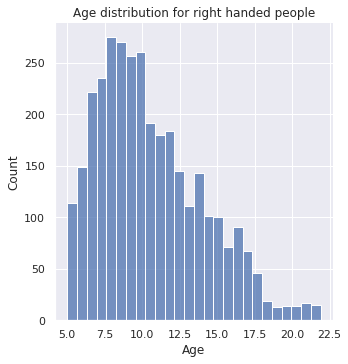

In [ ]:
sns.displot(pheno_mri[pheno_mri['EHQ_Total'] >= 40].Age)
pl.title('Age distribution for right handed people');

In [ ]:
unique = []
repetition = []
for i in pheno_mri[pheno_mri['EHQ_Total'] >= 40].EID.values:
  if i not in unique:
    unique.append(i)
  else:
    repetition.append(i)
print(pheno_mri[pheno_mri['EHQ_Total'] >= 40].shape[0])
print(len(unique))
print(len(repetition))
# There will be no repetition if we clean the data

3303
2684
619


In [ ]:
pheno_mri.to_csv(
    Path(working_path).joinpath('pheno_mri.csv')
)

## Pipeline to make the data convinient to use

In [135]:
# file with the identifiers that have mri imaging
pheno_mri = pd.read_csv(
    working_path.joinpath('pheno_mri.csv'),
    index_col=None
)

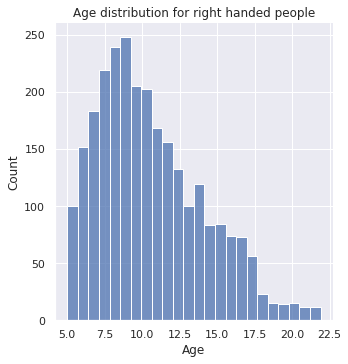

In [136]:
sns.displot(pheno_mri[pheno_mri['EHQ_Total'] >= 40].Age)
pl.title('Age distribution for right handed people');

In [137]:
pheno_mri.drop(['Unnamed: 0'], axis=1, inplace=True)

In [138]:
pheno_mri.head()

,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
0,NDARYM832PX3,1.0,7.048254,-33.35,No,Yes
1,NDARNJ687DMC,1.0,6.348163,46.67,No,Yes
2,NDARFM080VAF,1.0,7.623203,-100.00,No,Yes
3,NDARFW130NGG,1.0,8.316107,93.34,No,Yes
4,NDARDT800YVF,0.0,17.510381,86.67,No,Yes


In [139]:
data = pd.read_csv(
    working_path.joinpath('Query1.csv'),
    index_col=None
)

In [140]:
# work on Identifiers column
ids = data.Identifiers.values
new_ids = []
for i in ids:
  new_i = i.replace(',assessment', '')
  new_ids.append(new_i)	
print(len(ids))
print(len(new_ids))

data['Identifiers'] = new_ids

8210
8210


**Crossreferencing to understand who has the full pheno**

In [141]:
print(pheno_mri.shape)
print(data.shape)

(3539, 6)
(8210, 88)


In [142]:
full_ids = pheno_mri.EID.values
data_ids = data.Identifiers.values.tolist()
hits = []
misses = []
indices = []
for i in data_ids:
  if i in full_ids:
    hits.append(i)
  elif i not in full_ids:
    misses.append(i)
    indices.append(data_ids.index(i))
print(len(hits))

3538


In [143]:
# One participant is missing from the data. It could be the case that the experiment is nor over.
for i in full_ids:
  if i not in hits:
    print(i)

NDARAL828WXM


In [144]:
pheno_mri[pheno_mri['EID'] == 'NDARAL828WXM']

,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
2601,NDARAL828WXM,0.0,15.188569,63.34,Yes,Yes


In [145]:
data_pheno = data.copy()

In [146]:
for i in indices:
  data_pheno.drop([i], axis=0, inplace=True)

In [147]:
data_pheno.shape

(3538, 88)

Here is our reduced data frame with participant who has the full phenotypic file. Let's now choose only right handed participants.

We have 72 participants with no information on their handedness. Deleting them

In [148]:
data_pheno = data_pheno[data_pheno['EHQ,EHQ_Total'] != '.']

In [149]:
data_pheno['EHQ,EHQ_Total'] = data_pheno['EHQ,EHQ_Total'].astype(float)

<ipython-input-149-ea346f66752a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pheno['EHQ,EHQ_Total'] = data_pheno['EHQ,EHQ_Total'].astype(float)


In [150]:
data_pheno = data_pheno[data_pheno['EHQ,EHQ_Total'] >= 40]

In [151]:
data_pheno.shape

(2683, 88)

In [152]:
# work on Age column
data_pheno['Basic_Demos,Age'] = data_pheno['Basic_Demos,Age'].astype(float)

<ipython-input-152-a30b02d68c6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pheno['Basic_Demos,Age'] = data_pheno['Basic_Demos,Age'].astype(float)


In [153]:
# work on Sex column
data_pheno['Basic_Demos,Sex'] = data_pheno['Basic_Demos,Sex'].astype(int)

<ipython-input-153-aaeeca34a39b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pheno['Basic_Demos,Sex'] = data_pheno['Basic_Demos,Sex'].astype(int)


In [154]:
# work on Site column
data_pheno.drop(['Basic_Demos,Site'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [155]:
data_pheno.columns

Index(['Identifiers', 'Basic_Demos,Age', 'Basic_Demos,Sex', 'CELF,CELF_Total',
       'ConsensusDx,DX_01', 'ConsensusDx,DX_01_Code',
       'ConsensusDx,DX_01_Confirmed', 'ConsensusDx,DX_02',
       'ConsensusDx,DX_02_Code', 'ConsensusDx,DX_02_Confirmed',
       'ConsensusDx,DX_03', 'ConsensusDx,DX_03_Code',
       'ConsensusDx,DX_03_Confirmed', 'ConsensusDx,DX_04',
       'ConsensusDx,DX_04_Code', 'ConsensusDx,DX_04_Confirmed',
       'ConsensusDx,DX_05', 'ConsensusDx,DX_05_Code',
       'ConsensusDx,DX_05_Confirmed', 'ConsensusDx,DX_06',
       'ConsensusDx,DX_06_Code', 'ConsensusDx,DX_06_Confirmed',
       'ConsensusDx,DX_07', 'ConsensusDx,DX_07_Code',
       'ConsensusDx,DX_07_Confirmed', 'ConsensusDx,DX_08',
       'ConsensusDx,DX_08_Code', 'ConsensusDx,DX_08_Confirmed',
       'ConsensusDx,DX_09', 'ConsensusDx,DX_09_Code',
       'ConsensusDx,DX_09_Confirmed', 'ConsensusDx,DX_10',
       'ConsensusDx,DX_10_Code', 'ConsensusDx,DX_10_Confirmed',
       'DailyMeds,med_dose_01', 'Dai

In [156]:
# work on Diagnosis column
# looks like a dot could be no diagnosis as it seems to be consistent across the columns
# there are also nan values in confirmed column
# throw away this 'No Diagnosis Given: Incomplete Eval'
# give 0 to these 'No Diagnosis Given'
def diagnosis(df, number):
  name_diag = 'ConsensusDx,DX_0' + str(number)
  name_conf = 'ConsensusDx,DX_0' + str(number) + '_Confirmed'
  diagnosis = df[name_diag].values
  confirmed = df[name_conf].values

  dyslexia = []
  new_diagnosis = []
  for i in range(0, df.shape[0]):
    # if it's nan values
    if type(diagnosis[i]) == float:
      dyslexia.append(0)
      new_diagnosis.append(0)
    # if it's some type of LSD and 
    elif 'Specific Learning Disorder with' in diagnosis[i]:
      if confirmed[i] == 0:
        dyslexia.append(0)
        new_diagnosis.append(0)
      else:
        dyslexia.append(diagnosis[i])
        new_diagnosis.append('dys')
    # if it's a dot or empty spase
    elif diagnosis[i] == '.':
      dyslexia.append(0)
      new_diagnosis.append(0)
    elif diagnosis[i] == ' ':
      dyslexia.append(0)
      new_diagnosis.append(0)
    # if it's an incomplete inquery
    elif 'Incomplete' in diagnosis[i]:
      dyslexia.append('Incomplete')
      new_diagnosis.append('Incomplete')
    # if it's no diagnosis
    elif diagnosis[i] == 'No Diagnosis Given':
      dyslexia.append(0)
      new_diagnosis.append(0)
    # if it's some other disorder
    else:
      dyslexia.append(0)
      if confirmed[i] == 0:
        new_diagnosis.append(0)
      else:
        new_diagnosis.append(diagnosis[i])
  return dyslexia, new_diagnosis

In [157]:
all_diagnosis = {}
all_dys = {}
for i in range(1, 10):
  dyslexia, new_diagnosis = diagnosis(data_pheno, i)
  all_diagnosis['diag_%s' % i] = new_diagnosis
  all_dys['diag_%s' % i] = dyslexia

In [158]:
all_in_one = []
for i in range(0, data_pheno.shape[0]):
  participant = []
  for sublist in all_diagnosis:
    subset = all_diagnosis[sublist][i]
    if type(subset) == str:
      participant.append(subset)
  if len(participant) == 0:
    all_in_one.append(0)
  elif len(participant) == 1:
    all_in_one.append(participant[0])
  else:
    all_in_one.append(participant)

In [159]:
dys_in_one = []
for i in range(0, data_pheno.shape[0]):
  participant = []
  for sublist in all_dys:
    subset = all_dys[sublist][i]
    if type(subset) == str:
      participant.append(subset)
  if len(participant) == 0:
    dys_in_one.append(0)
  elif len(participant) == 1:
    dys_in_one.append(participant[0])
  else:
    dys_in_one.append(participant)

In [160]:
data_pheno['DD'] = dys_in_one
data_pheno['Diagnosis'] = all_in_one

<ipython-input-160-6f49888c9e1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pheno['DD'] = dys_in_one
<ipython-input-160-6f49888c9e1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pheno['Diagnosis'] = all_in_one


In [161]:
for i in range(1,10):
  name_diag = 'ConsensusDx,DX_0' + str(i)
  name_conf = 'ConsensusDx,DX_0' + str(i) + '_Confirmed'
  name_code = 'ConsensusDx,DX_0' + str(i) + '_Code'
  data_pheno.drop([name_diag], axis=1, inplace=True)
  data_pheno.drop([name_conf], axis=1, inplace=True)
  data_pheno.drop([name_code], axis=1, inplace=True)
data_pheno.drop(['ConsensusDx,DX_10'], axis=1, inplace=True)
data_pheno.drop(['ConsensusDx,DX_10_Code'], axis=1, inplace=True)
data_pheno.drop(['ConsensusDx,DX_10_Confirmed'], axis=1, inplace=True)

In [162]:
data_pheno[data_pheno['DD'] == 'Incomplete'].shape

(46, 59)

In [163]:
data_pheno = data_pheno[data_pheno['DD'] != 'Incomplete']
data_pheno.shape

(2637, 59)

In [164]:
print('Control subjects')
print(data_pheno[(data_pheno['DD'] == 0) & (data_pheno['Diagnosis'] == 0)].shape[0])
print('Disorders w/out DD')
print(data_pheno[(data_pheno['DD'] == 0) & (data_pheno['Diagnosis'] != 0)].shape[0])
print('Disorders w DD')
print(data_pheno[data_pheno['DD'] != 0].shape[0])

Control subjects
1726
Disorders w/out DD
746
Disorders w DD
165


In [165]:
data_filtered = data_pheno[~((data_pheno['DD'] == 0) & (data_pheno['Diagnosis'] != 0))]

In [166]:
data_filtered.shape

(1891, 59)

In [167]:
new_dtypes = []
dtypes = data_filtered.DD.values
for i in dtypes:
  if i == 0:
    new_dtypes.append(i)
  else:
    if type(i) == str:
      if 'Reading' in i:
        new_dtypes.append('Reading')
      elif 'Written' in i:
        new_dtypes.append('Writing')
      elif 'Mathematics' in i:
        new_dtypes.append('Math')
      else:
        print(i)
        break
    elif type(i) == list:
      if len(i) == 2:
        name1 = i[0][46:]
        name2 = i[1][46:]
        new_dtypes.append(name1 + ' and ' + name2)
      elif len(i) == 3:
        name1 = i[0][46:]
        name2 = i[1][46:]
        name3 = i[2][46:]
        new_dtypes.append(
            name1 + ' and ' + name2 + ' and ' + name3
            )
      else:
        print(i)
        break
    else:
      print(i)
      break

In [168]:
n_dtypes = []
for i in new_dtypes:
  if i == 'Reading and Mathematics and Mathematics':
    n_dtypes.append('Reading and Mathematics')
  elif i == 'Reading and Written Expression and Mathematics':
    n_dtypes.append('Reading and Mathematics and Written Expression')
  elif i == 'Mathematics and Reading and Reading':
    n_dtypes.append('Reading and Mathematics')
  elif i == 'Reading and Mathematics ':
    n_dtypes.append('Reading and Mathematics')
  else:
    n_dtypes.append(i)

In [169]:
data_filtered['DD'] = n_dtypes

<ipython-input-169-1060c2819d63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['DD'] = n_dtypes


In [170]:
data_filtered.DD.unique()

array([0, 'Reading', 'Math', 'Writing',
       'Reading and Mathematics and Written Expression',
       'Reading and Mathematics', 'Reading and Written Expression',
       'Mathematics and Written Expression'], dtype=object)

In [171]:
data_filtered.groupby(['DD'])[['Identifiers']].count()

,Identifiers
DD,
0,1726
Math,18
Mathematics and Written Expression,1
Reading,97
Reading and Mathematics,15
Reading and Mathematics and Written Expression,13
Reading and Written Expression,11
Writing,10


In [172]:
new_diag = []
diag = data_filtered.Diagnosis.values
for i in diag:
  if i == 0:
    new_diag.append(i)
  elif i == 'dys':
    new_diag.append(0)
  elif type(i) == list:
    if len(i) == 2:
      if i[0] == 'dys' and i[1] == 'dys':
        new_diag.append(0)
      elif i[0] == 'dys' and i[1] != 'dys':
        new_diag.append(i[1])
      elif i[0] != 'dys' and i[1] == 'dys':
        new_diag.append(i[0])
      else: 
        new_diag.append(i[0] + ' ' + i[1])
    elif len(i) == 3:
      if i[0] == 'dys' and i[1] == 'dys' and i[2] == 'dys':
        new_diag.append(0)
      elif i[0] == 'dys' and i[1] != 'dys' and i[2] != 'dys':
        new_diag.append(i[1] + ' ' + i[2])
      elif i[0] != 'dys' and i[1] == 'dys' and i[2] != 'dys':
        new_diag.append(i[0] + ' ' + i[2])
      elif i[0] != 'dys' and i[1] != 'dys' and i[2] == 'dys':
        new_diag.append(i[0] + ' ' + i[1])
      else:
        new_diag.append(i[0] + ' ' + i[1] + ' ' + i[2])
    else:
      name = ''
      for k in i:
        name = name + k
      new_diag.append(name)

In [173]:
n_diag = []
for i in new_diag:
  if i == 0:
    n_diag.append(0)
  elif 'ADHD' in i:
    n_diag.append('ADHD')
  elif 'Attention-Deficit' in i:
    n_diag.append('ADHD')
  elif 'Autism Spectrum' in i:
    n_diag.append('Autism')
  else:
    n_diag.append(i)

In [174]:
data_filtered['Diagnosis'] = n_diag

<ipython-input-174-137487eb167d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Diagnosis'] = n_diag


In [175]:
data_filtered.groupby(['Diagnosis'])[['Identifiers']].count()

,Identifiers
Diagnosis,
0,1765
ADHD,87
Adjustment Disorders,1
Autism,7
Developmental Coordination Disorder Language Disorder,1
Enuresis,3
Generalized Anxiety Disorder Specific Phobia,1
Language Disorder,7
Language Disorder Adjustment Disorders,1


In [176]:
# new coding will be 
# DD = 0 Diagnosis = 0 Control group
# DD = smth Diagnosis = 0 No comorbidity
# DD = smth Diagnosis = smth Comorbid
# DD = smth Diagnosis = ADHD Comorbid with ADHD, subject to exclusion
# DD = smth Diagnosis = Autism Comorbid with Autism, subject to exclusion
data_filtered[(data_filtered['DD'] != 0) & (data_filtered['Diagnosis'] == 0)].groupby(['DD'])['Identifiers'].count()

DD
Math                                               2
Reading                                           21
Reading and Mathematics                            7
Reading and Mathematics and Written Expression     4
Reading and Written Expression                     1
Writing                                            4
Name: Identifiers, dtype: int64

In [177]:
data_filtered['DailyMeds,med_name_01'].unique()

array(['.', nan, 'vyvanse', 'abilify', 'diphacalydramine', 'Concerta',
       'Claritin', 'concerta', 'Guanfacine', 'Singular', 'Singulair',
       'Focalin', 'Zyrteck'], dtype=object)

In [178]:
data_filtered['DailyMeds,med_name_02'].unique()

array(['.', nan, 'propranolol', 'trihexyphenidyl', 'zyrteck',
       'Robitussin', 'QVAR'], dtype=object)

In [179]:
data_filtered['DailyMeds,med_name_03'].unique()

array(['.', nan, 'Multivitamin, probiotic'], dtype=object)

In [180]:
def meds(df, number):
  medname = 'DailyMeds,med_name_0' + str(number)
  meds = df[medname].values
  new_meds = []

  for i in range(0, df.shape[0]):
    if meds[i] == '.':
      new_meds.append(0)
    elif type(meds[i]) == float:
      new_meds.append(0)
    elif type(meds[i]) == str:
      new_meds.append(meds[i])
    else:
      print(meds[i], i)
      break
  return new_meds

In [181]:
all_meds = {}
for i in range(1, 4):
  all_meds['med_%s' % i] = meds(data_filtered, i)

In [182]:
meds_in_one = []
for i in range(0, data_filtered.shape[0]):
  participant = []
  for sublist in all_meds:
    subset = all_meds[sublist][i]
    if type(subset) == str:
      participant.append(subset)
  if len(participant) == 0:
    meds_in_one.append(0)
  elif len(participant) == 1:
    meds_in_one.append(participant[0])
  else:
    name = ''
    for part in participant:
      name = name + part + ' '
    meds_in_one.append(name)

In [183]:
data_filtered['Medicine'] = meds_in_one

<ipython-input-183-16b99a23c1d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Medicine'] = meds_in_one


In [184]:
data_filtered[data_filtered['Medicine'] != 0][['Diagnosis', 'DD', 'Medicine']]

,Diagnosis,DD,Medicine
434,ADHD,Reading,vyvanse propranolol
677,Autism,Reading,abilify trihexyphenidyl
823,dys dys Speech Sound Disorder,Reading and Written Expression,diphacalydramine
895,ADHD,Reading,Concerta
937,0,0,Claritin
1294,0,0,concerta zyrteck
1306,ADHD,Reading and Written Expression,"Guanfacine Robitussin Multivitamin, probiotic"
1426,0,0,Singular
1540,0,0,Singulair
2138,ADHD,Reading,Focalin


In [185]:
for i in range(1,4):
  name_med = 'DailyMeds,med_name_0' + str(i)
  name_dose = 'DailyMeds,med_dose_0' + str(i)
  data_filtered.drop([name_med], axis=1, inplace=True)
  data_filtered.drop([name_dose], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Looking into IQ tests**

In [186]:
data_filtered.shape

(1891, 54)

In [187]:
status = []
dd = data_filtered.DD.values
diag = data_filtered.Diagnosis.values
for i in range(0, len(dd)):
  if dd[i] == 0 and diag[i] == 0:
    status.append(0)
  else:
    status.append(1)

In [188]:
data_filtered['Status'] = status

<ipython-input-188-1f31a41093ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Status'] = status


In [189]:
iq = data_filtered['WISC,WISC_FSIQ'].values
new_iq = []
for i in iq:
  if i == '.':
    new_iq.append('unknown')
  elif type(i) == float:
    new_iq.append('unknown')
  elif i.isnumeric():
    new_iq.append(int(i))
  else:
    print(i)
    break

In [190]:
data_filtered['WISC,WISC_FSIQ'] = new_iq

<ipython-input-190-0105be3d19ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['WISC,WISC_FSIQ'] = new_iq


In [191]:
data_filtered[(data_filtered['Status'] == 0) & (data_filtered['WISC,WISC_FSIQ'] == 'unknown')].shape

(299, 55)

In [192]:
data_filtered.columns

Index(['Identifiers', 'Basic_Demos,Age', 'Basic_Demos,Sex', 'CELF,CELF_Total',
       'EHQ,EHQ_Total', 'EVT,EVT2_StandardScore', 'GFTA,GFTA_SIS_Stnd',
       'GFTA,GFTA_SIW_Stnd', 'KBIT,KBIT_IQ_Comp', 'KBIT,KBIT_NV_Standard',
       'KBIT,KBIT_V_Standard', 'NIH,NIH_Card_Sort_Age_Corr_Stnd',
       'NIH,NIH_Card_Sort_Uncorr_Stnd', 'NIH,NIH_Flanker_Age_Corr_Stnd',
       'NIH,NIH_Flanker_Uncorr_Stnd', 'NIH,NIH_List_Sort_Age_Corr_Stnd',
       'NIH,NIH_List_Sort_Uncorr_Stnd', 'NIH,NIH_Processing_Age_Corr_Stnd',
       'NIH,NIH_Processing_Uncorr_Stnd', 'PPVT,PPVT4_StandardScore',
       'PreInt_Lang,Child_Lang_Understood', 'PreInt_Lang,Child_Primary_Lang',
       'SWAN,SWAN_HY', 'SWAN,SWAN_IN', 'SWAN,SWAN_Total',
       'TOWRE,TOWRE_PDE_Scaled', 'TOWRE,TOWRE_SWE_Scaled',
       'TOWRE,TOWRE_Total_Scaled', 'TRF,TRF_Total_T',
       'Vineland,VL_Social_Stnd', 'WAIS,WAIS_FSIQ_COMP',
       'WAIS,WAIS_FSIQ_SCALE', 'WAIS,WAIS_PRI_COMP', 'WAIS,WAIS_PSI_COMP',
       'WAIS,WAIS_VCI_COMP', 'WAIS,W

In [193]:
data_filtered[(data_filtered['Status'] == 1) & 
              (data_filtered['WISC,WISC_FSIQ'] == 'unknown') &
              (data_filtered['Basic_Demos,Age'] > 16)][[
    'Basic_Demos,Age', 'KBIT,KBIT_NV_Standard', 'KBIT,KBIT_V_Standard',
       'WAIS,WAIS_FSIQ_COMP', 'WAIS,WAIS_FSIQ_SCALE', 'WASI,WASI_FSIQ',
       'WIAT,WIAT_LCODC_Stnd', 'WIAT,WIAT_LCRV_Std', 'WIAT,WIAT_LC_Stnd',
       'WIAT,WIAT_MP_Stnd', 'WIAT,WIAT_Num_Stnd', 'WIAT,WIAT_Pseudo_Stnd',
       'WIAT,WIAT_RC_Stnd', 'WIAT,WIAT_Spell_Stnd', 'WIAT,WIAT_Word_Stnd',
       'DD', 'Diagnosis'
]]

,"Basic_Demos,Age","KBIT,KBIT_NV_Standard","KBIT,KBIT_V_Standard","WAIS,WAIS_FSIQ_COMP","WAIS,WAIS_FSIQ_SCALE","WASI,WASI_FSIQ","WIAT,WIAT_LCODC_Stnd","WIAT,WIAT_LCRV_Std","WIAT,WIAT_LC_Stnd","WIAT,WIAT_MP_Stnd","WIAT,WIAT_Num_Stnd","WIAT,WIAT_Pseudo_Stnd","WIAT,WIAT_RC_Stnd","WIAT,WIAT_Spell_Stnd","WIAT,WIAT_Word_Stnd",DD,Diagnosis
296,18.038558,.,.,NaN,NaN,105,86,126,108,83,94,63,NaN,74,71,Reading,ADHD
429,19.632101,.,.,94,92,.,103,93,98,85,89,72,82,64,79,Reading and Mathematics and Written Expression,Social Anxiety (Social Phobia)Language Disorde...
585,16.365845,.,.,121,131,.,125,127,132,120,117,93,129,89,110,Reading and Written Expression,ADHD
677,20.366073,88,82,NaN,NaN,NaN,72,92,79,81,86,57,71,68,54,Reading,Autism
740,17.288044,.,.,NaN,NaN,89,96,88,90,83,76,90,93,93,90,Reading and Mathematics and Written Expression,dysdysdysLanguage Disorder
795,16.672484,.,.,88,83,NaN,120,118,124,93,93,69,99,65,86,Reading,ADHD
1019,16.784280,100,88,.,.,NaN,111,117,117,77,72,98,81,106,102,Math,Autism
1347,16.715833,.,.,80,72,.,93,100,96,84,74,91,95,90,104,Math,ADHD
2147,20.910107,.,.,NaN,NaN,91,79,92,83,69,62,56,70,60,46,Reading and Mathematics,0
2324,17.668491,.,.,NaN,NaN,102,NaN,NaN,103,77,97,82,96,70,64,Reading and Written Expression,ADHD


In [194]:
data_filtered[(data_filtered['Status'] == 1) & 
              (data_filtered['WISC,WISC_FSIQ'] == 'unknown') &
              (data_filtered['Basic_Demos,Age'] < 6)][[
    'Basic_Demos,Age', 'KBIT,KBIT_NV_Standard', 'KBIT,KBIT_V_Standard',
       'WAIS,WAIS_FSIQ_COMP', 'WAIS,WAIS_FSIQ_SCALE', 'WASI,WASI_FSIQ',
       'WIAT,WIAT_LCODC_Stnd', 'WIAT,WIAT_LCRV_Std', 'WIAT,WIAT_LC_Stnd',
       'WIAT,WIAT_MP_Stnd', 'WIAT,WIAT_Num_Stnd', 'WIAT,WIAT_Pseudo_Stnd',
       'WIAT,WIAT_RC_Stnd', 'WIAT,WIAT_Spell_Stnd', 'WIAT,WIAT_Word_Stnd',
       'DD', 'Diagnosis'
]]

,"Basic_Demos,Age","KBIT,KBIT_NV_Standard","KBIT,KBIT_V_Standard","WAIS,WAIS_FSIQ_COMP","WAIS,WAIS_FSIQ_SCALE","WASI,WASI_FSIQ","WIAT,WIAT_LCODC_Stnd","WIAT,WIAT_LCRV_Std","WIAT,WIAT_LC_Stnd","WIAT,WIAT_MP_Stnd","WIAT,WIAT_Num_Stnd","WIAT,WIAT_Pseudo_Stnd","WIAT,WIAT_RC_Stnd","WIAT,WIAT_Spell_Stnd","WIAT,WIAT_Word_Stnd",DD,Diagnosis
4586,5.877138,83,93,.,.,.,.,.,.,.,.,.,.,.,.,Reading and Mathematics,ADHD


In [195]:
data_filtered[(data_filtered['Status'] == 1) & 
              (data_filtered['WISC,WISC_FSIQ'] == 'unknown') &
              (data_filtered['Basic_Demos,Age'] <= 16) &
              (data_filtered['Basic_Demos,Age'] >= 6)][[
    'Basic_Demos,Age', 'KBIT,KBIT_NV_Standard', 'KBIT,KBIT_V_Standard',
       'WAIS,WAIS_FSIQ_COMP', 'WAIS,WAIS_FSIQ_SCALE', 'WASI,WASI_FSIQ',
       'WIAT,WIAT_LCODC_Stnd', 'WIAT,WIAT_LCRV_Std', 'WIAT,WIAT_LC_Stnd',
       'WIAT,WIAT_MP_Stnd', 'WIAT,WIAT_Num_Stnd', 'WIAT,WIAT_Pseudo_Stnd',
       'WIAT,WIAT_RC_Stnd', 'WIAT,WIAT_Spell_Stnd', 'WIAT,WIAT_Word_Stnd',
       'DD', 'Diagnosis'
]]

,"Basic_Demos,Age","KBIT,KBIT_NV_Standard","KBIT,KBIT_V_Standard","WAIS,WAIS_FSIQ_COMP","WAIS,WAIS_FSIQ_SCALE","WASI,WASI_FSIQ","WIAT,WIAT_LCODC_Stnd","WIAT,WIAT_LCRV_Std","WIAT,WIAT_LC_Stnd","WIAT,WIAT_MP_Stnd","WIAT,WIAT_Num_Stnd","WIAT,WIAT_Pseudo_Stnd","WIAT,WIAT_RC_Stnd","WIAT,WIAT_Spell_Stnd","WIAT,WIAT_Word_Stnd",DD,Diagnosis
2555,13.326374,.,.,.,.,84,74,96,82,82,74,59,71,59,46,Reading and Mathematics and Written Expression,ADHD
4543,7.681496,82,78,.,.,68,NaN,NaN,NaN,NaN,88,66,NaN,102,98,Reading,ADHD
4633,8.527378,.,.,.,.,107,NaN,NaN,NaN,NaN,102,91,NaN,77,92,Writing,0
4639,15.302988,.,.,.,.,111,NaN,NaN,105,87,87,76,97,73,68,Reading and Written Expression,ADHD
4642,7.560346,.,.,.,.,102,NaN,NaN,NaN,82,90,69,NaN,69,65,Reading and Written Expression,ADHD
4649,7.506160,.,.,.,.,101,NaN,NaN,NaN,NaN,93,80,NaN,80,79,Reading and Written Expression,ADHD
4660,9.094227,.,.,.,.,94,NaN,NaN,NaN,NaN,87,111,NaN,113,115,Math,ADHD
4666,14.468514,.,.,.,.,79,NaN,NaN,NaN,NaN,84,96,NaN,99,102,Reading and Mathematics and Written Expression,Persistent Depressive Disorder (Dysthymia)Lang...
4667,9.736938,.,.,.,.,101,NaN,NaN,NaN,110,96,84,94,85,87,Reading and Mathematics and Written Expression,0
4714,7.528177,.,.,.,.,92,NaN,NaN,NaN,NaN,99,102,NaN,80,86,Reading and Written Expression,ADHD


Text(0.5, 1.0, 'The distribution of IQ for known values in clinical population')

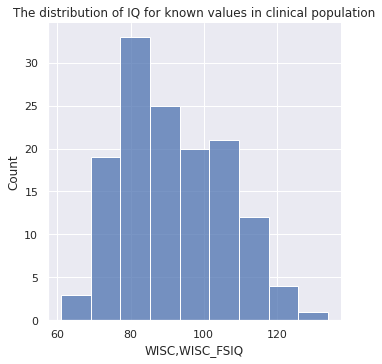

In [196]:
sns.displot(
    data_filtered[
    (data_filtered['Status'] == 1) & 
    (data_filtered['WISC,WISC_FSIQ'] != 'unknown')]['WISC,WISC_FSIQ']);
pl.title('The distribution of IQ for known values in clinical population')

In [197]:
snap = data_filtered[data_filtered['WISC,WISC_FSIQ'] != 'unknown']
print('Have IQ > 85: ', snap[snap['WISC,WISC_FSIQ'] > 85].shape[0])
print('DD group with IQ > 85: ', snap[(snap['Status'] == 1) & (snap['WISC,WISC_FSIQ'] > 85)].shape[0])
print('Controls with IQ > 85: ', snap[(snap['Status'] == 0) & (snap['WISC,WISC_FSIQ'] > 85)].shape[0])

Have IQ > 85:  1230
DD group with IQ > 85:  83
Controls with IQ > 85:  1147


In [198]:
# 20 people out of clinical pool don't have WISC tests
# all of them have some of WIAT scores, 2 have KBIT (IQ < 70??), 1 have WAIS
data_filtered[
    (data_filtered['WISC,WISC_FSIQ'] == 'unknown') & 
    (data_filtered['Basic_Demos,Age'] < 17) &
    (data_filtered['Basic_Demos,Age'] > 6) &
    (data_filtered['Status'] != 0)
    ][[
        'Basic_Demos,Age', 'KBIT,KBIT_NV_Standard', 'KBIT,KBIT_V_Standard',
       'WAIS,WAIS_FSIQ_COMP', 'WAIS,WAIS_FSIQ_SCALE', 'WASI,WASI_FSIQ',
       'WIAT,WIAT_LCODC_Stnd', 'WIAT,WIAT_LCRV_Std', 'WIAT,WIAT_LC_Stnd',
       'WIAT,WIAT_MP_Stnd', 'WIAT,WIAT_Num_Stnd', 'WIAT,WIAT_Pseudo_Stnd',
       'WIAT,WIAT_RC_Stnd', 'WIAT,WIAT_Spell_Stnd', 'WIAT,WIAT_Word_Stnd',
       'DD', 'Diagnosis'
        ]]

,"Basic_Demos,Age","KBIT,KBIT_NV_Standard","KBIT,KBIT_V_Standard","WAIS,WAIS_FSIQ_COMP","WAIS,WAIS_FSIQ_SCALE","WASI,WASI_FSIQ","WIAT,WIAT_LCODC_Stnd","WIAT,WIAT_LCRV_Std","WIAT,WIAT_LC_Stnd","WIAT,WIAT_MP_Stnd","WIAT,WIAT_Num_Stnd","WIAT,WIAT_Pseudo_Stnd","WIAT,WIAT_RC_Stnd","WIAT,WIAT_Spell_Stnd","WIAT,WIAT_Word_Stnd",DD,Diagnosis
585,16.365845,.,.,121,131,.,125,127,132,120,117,93,129,89,110,Reading and Written Expression,ADHD
795,16.672484,.,.,88,83,NaN,120,118,124,93,93,69,99,65,86,Reading,ADHD
1019,16.784280,100,88,.,.,NaN,111,117,117,77,72,98,81,106,102,Math,Autism
1347,16.715833,.,.,80,72,.,93,100,96,84,74,91,95,90,104,Math,ADHD
2555,13.326374,.,.,.,.,84,74,96,82,82,74,59,71,59,46,Reading and Mathematics and Written Expression,ADHD
4543,7.681496,82,78,.,.,68,NaN,NaN,NaN,NaN,88,66,NaN,102,98,Reading,ADHD
4633,8.527378,.,.,.,.,107,NaN,NaN,NaN,NaN,102,91,NaN,77,92,Writing,0
4639,15.302988,.,.,.,.,111,NaN,NaN,105,87,87,76,97,73,68,Reading and Written Expression,ADHD
4642,7.560346,.,.,.,.,102,NaN,NaN,NaN,82,90,69,NaN,69,65,Reading and Written Expression,ADHD
4649,7.506160,.,.,.,.,101,NaN,NaN,NaN,NaN,93,80,NaN,80,79,Reading and Written Expression,ADHD


In [199]:
# 6 people out of clinical pool don't have WISC tests
# all of them have some of WIAT scores, 2 have KBIT (IQ < 70??), 1 have WAIS
data_filtered[
    (data_filtered['WISC,WISC_FSIQ'] == 'unknown') & 
    (data_filtered['Basic_Demos,Age'] >= 17) &
    (data_filtered['Status'] != 0)
    ][[
        'Basic_Demos,Age', 'KBIT,KBIT_NV_Standard', 'KBIT,KBIT_V_Standard',
       'WAIS,WAIS_FSIQ_COMP', 'WAIS,WAIS_FSIQ_SCALE', 'WASI,WASI_FSIQ',
       'WIAT,WIAT_LCODC_Stnd', 'WIAT,WIAT_LCRV_Std', 'WIAT,WIAT_LC_Stnd',
       'WIAT,WIAT_MP_Stnd', 'WIAT,WIAT_Num_Stnd', 'WIAT,WIAT_Pseudo_Stnd',
       'WIAT,WIAT_RC_Stnd', 'WIAT,WIAT_Spell_Stnd', 'WIAT,WIAT_Word_Stnd',
       'DD', 'Diagnosis'
        ]]

,"Basic_Demos,Age","KBIT,KBIT_NV_Standard","KBIT,KBIT_V_Standard","WAIS,WAIS_FSIQ_COMP","WAIS,WAIS_FSIQ_SCALE","WASI,WASI_FSIQ","WIAT,WIAT_LCODC_Stnd","WIAT,WIAT_LCRV_Std","WIAT,WIAT_LC_Stnd","WIAT,WIAT_MP_Stnd","WIAT,WIAT_Num_Stnd","WIAT,WIAT_Pseudo_Stnd","WIAT,WIAT_RC_Stnd","WIAT,WIAT_Spell_Stnd","WIAT,WIAT_Word_Stnd",DD,Diagnosis
296,18.038558,.,.,NaN,NaN,105,86,126,108,83,94,63,NaN,74,71,Reading,ADHD
429,19.632101,.,.,94,92,.,103,93,98,85,89,72,82,64,79,Reading and Mathematics and Written Expression,Social Anxiety (Social Phobia)Language Disorde...
677,20.366073,88,82,NaN,NaN,NaN,72,92,79,81,86,57,71,68,54,Reading,Autism
740,17.288044,.,.,NaN,NaN,89,96,88,90,83,76,90,93,93,90,Reading and Mathematics and Written Expression,dysdysdysLanguage Disorder
2147,20.910107,.,.,NaN,NaN,91,79,92,83,69,62,56,70,60,46,Reading and Mathematics,0
2324,17.668491,.,.,NaN,NaN,102,NaN,NaN,103,77,97,82,96,70,64,Reading and Written Expression,ADHD


In [200]:
# 1 person out of clinical pool don't have WISC tests
data_filtered[
    (data_filtered['WISC,WISC_FSIQ'] == 'unknown') & 
    (data_filtered['Basic_Demos,Age'] <= 6) &
    (data_filtered['Status'] != 0)
    ][[
        'Basic_Demos,Age', 'KBIT,KBIT_NV_Standard', 'KBIT,KBIT_V_Standard',
       'WAIS,WAIS_FSIQ_COMP', 'WAIS,WAIS_FSIQ_SCALE', 'WASI,WASI_FSIQ',
       'WIAT,WIAT_LCODC_Stnd', 'WIAT,WIAT_LCRV_Std', 'WIAT,WIAT_LC_Stnd',
       'WIAT,WIAT_MP_Stnd', 'WIAT,WIAT_Num_Stnd', 'WIAT,WIAT_Pseudo_Stnd',
       'WIAT,WIAT_RC_Stnd', 'WIAT,WIAT_Spell_Stnd', 'WIAT,WIAT_Word_Stnd',
       'DD', 'Diagnosis'
        ]]

,"Basic_Demos,Age","KBIT,KBIT_NV_Standard","KBIT,KBIT_V_Standard","WAIS,WAIS_FSIQ_COMP","WAIS,WAIS_FSIQ_SCALE","WASI,WASI_FSIQ","WIAT,WIAT_LCODC_Stnd","WIAT,WIAT_LCRV_Std","WIAT,WIAT_LC_Stnd","WIAT,WIAT_MP_Stnd","WIAT,WIAT_Num_Stnd","WIAT,WIAT_Pseudo_Stnd","WIAT,WIAT_RC_Stnd","WIAT,WIAT_Spell_Stnd","WIAT,WIAT_Word_Stnd",DD,Diagnosis
4586,5.877138,83,93,.,.,.,.,.,.,.,.,.,.,.,.,Reading and Mathematics,ADHD


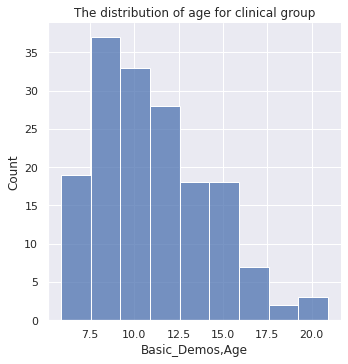

In [201]:
sns.displot(data_filtered[data_filtered['Status'] == 1]['Basic_Demos,Age'])
pl.title('The distribution of age for clinical group');

In [202]:
group56 = 0
group67 = 0
group78 = 0
group89 = 0
group910 = 0
group1015 = 0
group15up = 0
ages = data_filtered[data_filtered['Status'] == 1]['Basic_Demos,Age'].values
for i in ages:
  if i < 6:
    group56 += 1
  elif 6 <= i < 7:
    group67 += 1
  elif 7 <= i < 8:
    group78 += 1
  elif 8 <= i < 9:
    group89 += 1
  elif 9 <= i < 10:
    group910 += 1
  elif 10 <= i < 15:
    group1015 += 1
  elif i >= 15:
    group15up += 1
  else:
    print(i)
    break
print('5-6 y.o.', group56)
print('6-7 y.o.', group67)
print('7-8 y.o.', group78)
print('8-9 y.o.', group89)
print('9-10 y.o.', group910)
print('10-15 y.o.', group1015)
print('more than 15 y.o.', group15up)

5-6 y.o. 1
6-7 y.o. 13
7-8 y.o. 19
8-9 y.o. 17
9-10 y.o. 25
10-15 y.o. 71
more than 15 y.o. 19


## Exclusion

In [203]:
# without Math, Writing, Math+Writing
# 136 DD cases left (33 non comorbid)
data_filtered = data_filtered[data_filtered['DD'] != 'Math']
data_filtered = data_filtered[data_filtered['DD'] != 'Writing']
data_filtered = data_filtered[data_filtered['DD'] != 'Mathematics and Written Expression']

In [204]:
#without Autism and Borderline
# 6 cases of autism and 1 borderline
data_filtered = data_filtered[data_filtered['Diagnosis'] != 'Autism']
data_filtered = data_filtered[data_filtered['Diagnosis'] != 'Language Disorder Borderline Intellectual Functioning']

In [205]:
# excluding all meds from both controls and dyslexics
# 10 cases
data_filtered = data_filtered[data_filtered['Medicine'] == 0]

In [206]:
# excluding people older than 18
# 3 DD cases and 46 TD
data_filtered = data_filtered[data_filtered['Basic_Demos,Age'] <= 18]

Standardizing the IQ scores and Excluding people with the IQ scores less than 70. The main test is WISC. All others are additional. 

In [216]:
# substituting rare nan values with '.' for the standardisation of missing values
data_filtered['KBIT,KBIT_IQ_Comp'] = data_filtered['KBIT,KBIT_IQ_Comp'].fillna('.')
data_filtered['WASI,WASI_FSIQ'] = data_filtered['WASI,WASI_FSIQ'].fillna('.')
data_filtered['WAIS,WAIS_FSIQ_SCALE'] = data_filtered['WAIS,WAIS_FSIQ_SCALE'].fillna('.')

In [249]:
reference_test = []
iq_value = []
wisc = data_filtered['WISC,WISC_FSIQ'].values
kbit = data_filtered['KBIT,KBIT_IQ_Comp'].values
wasi = data_filtered['WASI,WASI_FSIQ'].values
wais = data_filtered['WAIS,WAIS_FSIQ_SCALE'].values
age = data_filtered['Basic_Demos,Age'].values

for i in range(0, data_filtered.shape[0]):
  if wisc[i] == 'unknown' and kbit[i] == '.' and wais[i] == '.' and wasi[i] == '.':
    iq_value.append('none')
    reference_test.append('none')
  elif wisc[i] != 'unknown':
    if kbit[i] == '.':
      iq_value.append(int(wisc[i]))
      reference_test.append('wisc')
    else:
      if age[i] < 6:
        iq_value.append(int(kbit[i]))
        reference_test.append('kbit')
      else:
        iq_value.append(int(wisc[i]))
        reference_test.append('wisc')
  else:
    if kbit[i] != '.' and wasi[i] != '.':
      iq_value.append(int(wasi[i]))
      reference_test.append('wasi')
    elif kbit[i] != '.':
      iq_value.append(int(kbit[i]))
      reference_test.append('kbit')
    elif wasi[i] != '.':
      iq_value.append(int(wasi[i]))
      reference_test.append('wasi')
    elif wais[i] != '.':
      iq_value.append(int(wais[i]))
      reference_test.append('wais')

In [253]:
data_filtered['IQ'] = iq_value
data_filtered['Test'] = reference_test 

In [256]:
# excluding people with no IQ tests, 34 controls
data_filtered = data_filtered[data_filtered['IQ'] != 'none']

In [265]:
# excluding people with IQ < 70: 3 DD and 45 TD
data_filtered = data_filtered[data_filtered['IQ'] >= 70]

In [266]:
print('Controls: ', data_filtered[data_filtered['Status'] == 0].shape[0])
print('DD cases: ', data_filtered[data_filtered['Status'] == 1].shape[0])

Controls:  1596
DD cases:  118


# Characteristics of the ready dataset

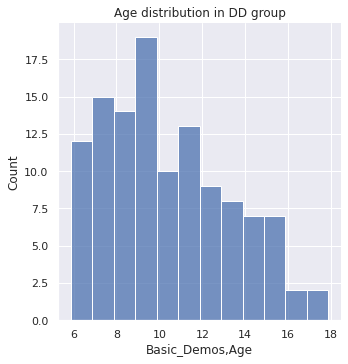

In [267]:
sns.displot(data_filtered[data_filtered['Status'] == 1]['Basic_Demos,Age'],
             binwidth = 1)
pl.title('Age distribution in DD group');

In [274]:
print('5-6 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] > 5) & (data_filtered['Basic_Demos,Age'] < 6) & (data_filtered['Status'] == 1)].shape[0])
print('6-7 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 6) & (data_filtered['Basic_Demos,Age'] < 7) & (data_filtered['Status'] == 1)].shape[0])
print('7-8 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 7) & (data_filtered['Basic_Demos,Age'] < 8) & (data_filtered['Status'] == 1)].shape[0])
print('8-9 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 8) & (data_filtered['Basic_Demos,Age'] < 9) & (data_filtered['Status'] == 1)].shape[0])
print('9-10 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 9) & (data_filtered['Basic_Demos,Age'] < 10) & (data_filtered['Status'] == 1)].shape[0])
print('10-11 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 10) & (data_filtered['Basic_Demos,Age'] < 11) & (data_filtered['Status'] == 1)].shape[0])
print('11-12 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 11) & (data_filtered['Basic_Demos,Age'] < 12) & (data_filtered['Status'] == 1)].shape[0])
print('from 12 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 12) & (data_filtered['Status'] == 1)].shape[0])

5-6 years old
1
6-7 years old
12
7-8 years old
17
8-9 years old
11
9-10 years old
20
10-11 years old
12
11-12 years old
12
from 12 years old
33
